## MNIST Dataset

The Modified National Institute of Standards and Technology ([MNIST](https://en.wikipedia.org/wiki/MNIST_database)) database is a large database of handwritten digits. It was created by mixing samples taken from American Sensor board employees and those taken from high school students.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
# Load dataset
# The path needs to be updated with the path to the data files
df_train = pd.read_csv('C:/Users/Dell/Desktop/RITHU/Notebook Stats and ML Models/Projects/MNIST/mnist_train.csv')
df_test = pd.read_csv('C:/Users/Dell/Desktop/RITHU/Notebook Stats and ML Models/Projects/MNIST/mnist_test.csv')

The training and test dataset consists of 60,000 and 10,000 samples of handwritten digits in grayscale images, respectively. Each image has been scaled to 28 x 28 pixels. Each pixel has values in the range [0,255]. The pixels of the images have been flattened into an array of size 28 x 28 = 784. Each image in the training set has been labelled as [0-9].

In [3]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [4]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [7]:
df_test.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


## Data Visualization
Let us plot the first few images of the training dataset along with their labels. In order to do that, we need to reshape the images from 784 into 28 x 28 pixels.

In [8]:
train_images = np.reshape(df_train.drop(columns='label').values,(60000,28,28))
test_images  = np.reshape(df_test.drop(columns='label').values,(10000,28,28))

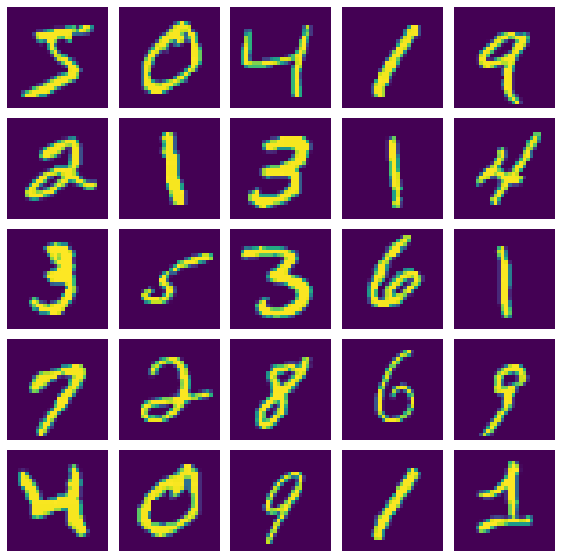

In [9]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i,:,:])
  plt.axis('off')
plt.subplots_adjust(wspace=0.0, hspace=0.1) 

Prepare X_Train and Y_Train for model fitting. Re-scale the pixel values from [0:255] to [0:1].

In [10]:
X_Train = df_train.drop(columns='label').values/255
X_Test  = df_test.drop(columns='label').values/255
Y_Train = df_train['label'].values
Y_Test  = df_test['label'].values

## Model Building and Compilation

Now let us build the model using a feed-forward neural network consisting of 3 layers:
* Input layer: 784 neurons corresponding to the 28 x 28 pixels
* Second layer: hidden layer consisting of 64 neurons
* Output layer: 10 nodes corresponding to the digits [0-9]

We would be using the Rectified Linear Units (ReLU) activation for the first two layers. For the output layer we would be using the 'softmax' activation the convert the outputs into categorical probabilities.

The model is compiled with the 'Adam' optimizer with accuracy serving as the metrics of the fitting. The categorical cross-entropy function, that is suitable for multi-class classification problems calculates the loss function. 

In [11]:
# Build the model
# 3 layers, 2 layers with 64 neurons + ReLu activation function
# l layer with 10 neuron and softmax function (Maximum entropy)
model = Sequential()
model.add(Dense(64,activation='relu',input_dim = 784))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
# Complie the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

In [13]:
# Train the model
X_Train_fit = model.fit(
    X_Train,
    to_categorical(Y_Train), # Ex. 2 -> [0,0,1,0,0,0,0,0,0,0]
    epochs = 10,
    batch_size = 50
)

Epoch 1/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.5471 - accuracy: 0.8438
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1499 - accuracy: 0.9543
Epoch 3/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1018 - accuracy: 0.9680
Epoch 4/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0793 - accuracy: 0.9760
Epoch 5/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9795
Epoch 6/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0476 - accuracy: 0.9856
Epoch 7/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0418 - accuracy: 0.9866
Epoch 8/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0367 - accuracy: 0.9888
Epoch 9/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 10/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.026

## Training Performance

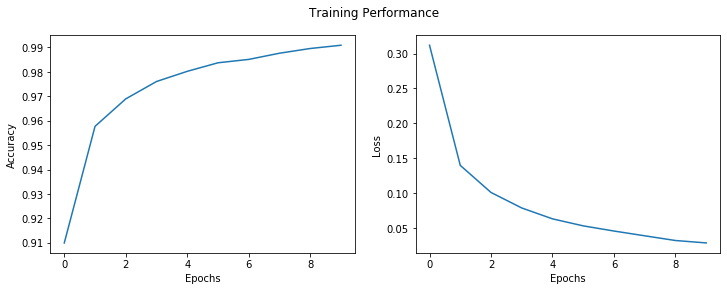

In [14]:
# Plot the training performance
plt.figure(figsize=(12,4))
plt.suptitle('Training Performance')

plt.subplot(121)
plt.plot(X_Train_fit.epoch,X_Train_fit.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(122)
plt.plot(X_Train_fit.epoch,X_Train_fit.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

## Model Evaluation

In [15]:
# Evaluate the model
model.evaluate(
    X_Test,
    to_categorical(Y_Test)
)

313/313 [==============================] - 1s 1ms/step - loss: 0.0971 - accuracy: 0.9753


[0.09705635160207748, 0.9753000140190125]

The accuracy of the test set is slightly lower than that of the training set (the difference being by ~ 2%). It is possible that this can e due to overfitting of the traiing data. It might partition the training set into a validation set to further minimize this difference.

## Result Visualization
Let us visualize a random set of test images along with the predicted classifications.

In [16]:
indices = np.random.randint(10000,size=25)

In [17]:
# predict on the first 5 test images
predictions = model.predict(X_Test[indices,:])
# Print model predictions
print(np.argmax(predictions, axis = 1))
print(Y_Test[indices])

[8 8 5 3 6 4 9 4 4 1 6 1 1 7 2 4 0 0 6 1 7 7 7 7 6]
[8 8 5 3 6 4 9 4 4 1 2 1 1 7 2 4 0 0 6 1 7 7 7 7 6]


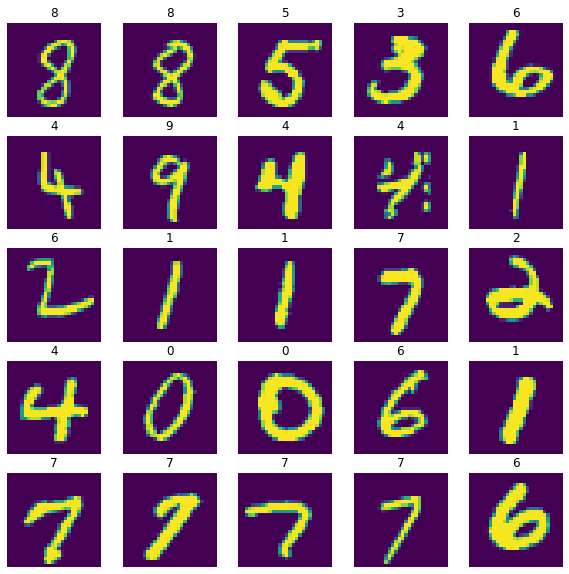

In [18]:
plt.figure(figsize=(10,10))
j = 0
for i in indices:
  plt.subplot(5,5,j+1)
  plt.imshow(test_images[i,:,:])
  plt.axis('off')
  plt.title(str(np.argmax(predictions, axis = 1)[j]))
  j = j+1
plt.show()